In [1]:
from workflow.modules import *
import resources

%load_ext autoreload
%autoreload 2

3,578 structures without any SWISS-MODEL structures (experimental or homology)
912 structures with enzyme-like size (100 to 500 residues), and above-average confidence (mean pLDDT >= 50)
170 previously annotated as enzymes (EC number and/or a catalytic activity annotation
449 have a high-confidence (mean pLDDT >= 90) pocket with an AutoSite score similar to ground truth UBS binding sites (~35)


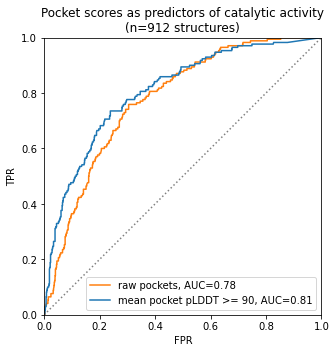

In [11]:
fp_ = 'fig4D.tsv'
df_ = pd.read_csv(fp_, sep='\t')
print(f'{uf(len(df_))} structures without any SWISS-MODEL structures (experimental or homology)')
df_ = df_.query('(mean_pLDDT >= 70) & (100 <= n_resid) & (n_resid <= 500)')
print(f'{uf(len(df_))} structures with enzyme-like size (100 to 500 residues), and above-average confidence (mean pLDDT >= 50)')
print(f'{uf(len(df_.query("has_activity == True")))} previously annotated as enzymes (EC number and/or a catalytic activity annotation')
print(f'{uf(len(df_.query("autosite_score_90 >= 35")))} have a high-confidence (mean pLDDT >= 90) pocket with an AutoSite score similar to ground truth UBS binding sites (~35)')

def auc_(*args, **kwargs):
    fpr, tpr, thresholds = sk.metrics.roc_curve(*args, **kwargs)
    auc = sk.metrics.roc_auc_score(*args, **kwargs)
    return(fpr, tpr, thresholds, auc)

def roc_(*args, label, color, **kwargs):
    fpr, tpr, thresholds, auc = auc_(*args, **kwargs)
    plt.plot(fpr, tpr, label=f'{label}, AUC={auc:.2f}', color=color)
    #sns.lineplot(fpr, tpr, label=f'{label}, AUC={auc:.2f}')

def legend_():
    plt.gca().set_xlim(0, 1)
    plt.gca().set_ylim(0, 1)
    plt.gca().set_aspect('equal')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')
    plt.gca().set_xlabel('FPR')
    plt.gca().set_ylabel('TPR')
    plt.legend(loc='lower right')

plt.figure(figsize=(5.1,5.1))
plt.title(f'Pocket scores as predictors of catalytic activity\n(n={uf(len(df_))} structures)')
roc_(y_true=df_['has_activity'].astype(int), y_score=df_['autosite_score'].fillna(0), label='raw pockets', color='tab:orange')
roc_(y_true=df_['has_activity'].astype(int), y_score=df_['autosite_score_90'].fillna(0), label='mean pocket pLDDT >= 90', color='tab:blue')
legend_()
plt.savefig('fig4D.pdf', bbox_inches='tight', transparent=True)

In [3]:
# Percentile-rank of example discussed on Figs 4E,F (O15121)
cols_ = ['autosite_score', 'autosite_score_50', 'autosite_score_70', 'autosite_score_90', 'autosite_score_95']
df_.set_index('UniProtKB_ac')[cols_].rank(pct=True).query('UniProtKB_ac == "O15121"')

,autosite_score,autosite_score_50,autosite_score_70,autosite_score_90,autosite_score_95
UniProtKB_ac,,,,,
O15121,0.845395,0.845395,0.857456,0.938596,0.987939


In [16]:
print(len(df_), 'structures evaluated in total')
df_.set_index('UniProtKB_ac')[cols_].rank(pct=False, ascending=False).query('UniProtKB_ac == "O15121"')

912 structures evaluated in total


,autosite_score,autosite_score_50,autosite_score_70,autosite_score_90,autosite_score_95
UniProtKB_ac,,,,,
O15121,142.0,142.0,131.0,57.0,12.0
